# Redes Neuronales


#### Entrenamiento.
#### Clasificación Notas

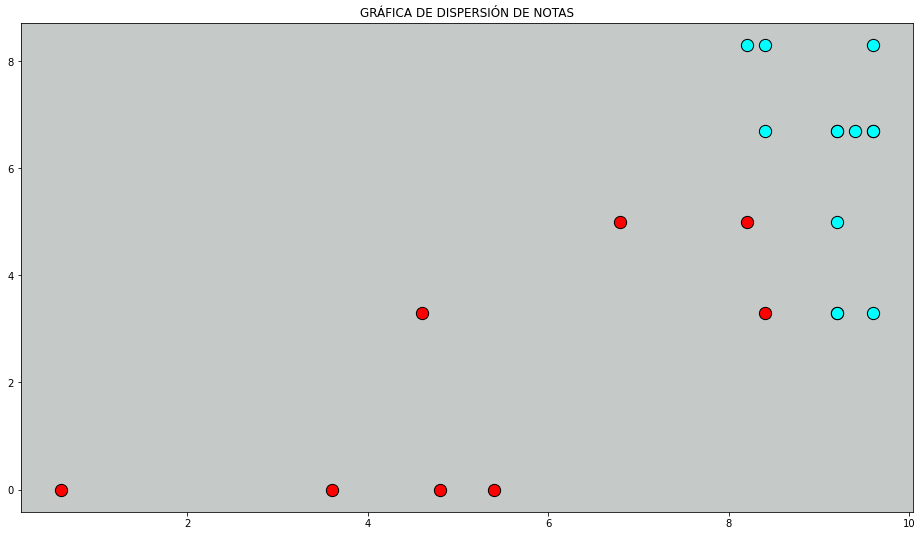

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
ax = plt.gca()
ax.set_facecolor('xkcd:silver')

#Plotear y clasificar los puntos
def plot_points(X, y):
    aceptados = X[np.argwhere(y==1)]
    negados = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in negados], [s[0][1] for s in negados], s = 150, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in aceptados], [s[0][1] for s in aceptados], s = 150, color = 'cyan', edgecolor = 'k')

#Líneas de Entrenamiento
def display(m, b, color='y--'):
    plt.xlim(-0.5,10)
    plt.ylim(-0.5,10)
    x = np.arange(-10, 10, 0.15)
    plt.plot(x, m*x+b, color)

#Archivo de datos
df = pd.read_csv('./datosnotas.csv',header=None,names=['EjeX','EjeY', 'Tipo'])

#Creación de arreglos
X = np.array(df[['EjeX','EjeY']])
y = np.array(df['Tipo'])
plot_points(X,y) #Plotear los puntos con las coordenadas
plt.title("GRÁFICA DE DISPERSIÓN DE NOTAS") #Título de la gráfica
plt.show() #Mostrar puntos


In [207]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(46)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick. The function should receive as inputs
# the data X, the labels y, the weights W (as an array), and the bias b, update the weights and bias W,
# b, according to the perceptron algorithm, and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.19):
    # Fill in code
    for i in range(len(X)):
        result_y=prediction(X[i], W, b)
        if y[i]-result_y==1:
            W[0]+=X[i][0]*learn_rate
            W[1]+=X[i][1]*learn_rate
            b+=learn_rate
        if y[i]-result_y==-1:
            W[0]-=X[i][0]*learn_rate
            W[1]-=X[i][1]*learn_rate
            b-=learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset, and returns a few of the boundary
# lines obtained in the iterations, for plotting purposes. Feel free to play with the learning rate and 
# the num_epochs, and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.19, num_epochs = 185):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))

        '''
        Solo para las impresiones de las lineas
        '''
        if i % (num_epochs / 40) == 0:
            display(-W[0]/W[1], -b/W[1])
            
    # Ploteando la solución límite
    plt.title("GRÁFICA DE CLASICACIÓN")
    #display(-W[0]/W[1], -b/W[1], 'black')
    display(-W[0]/W[1], -b/W[1], 'black')  #Línea divisora
    
    # Ploteando los datos con sus coordenadas
    plot_points(X, y)
    plt.show()
    
    return boundary_lines

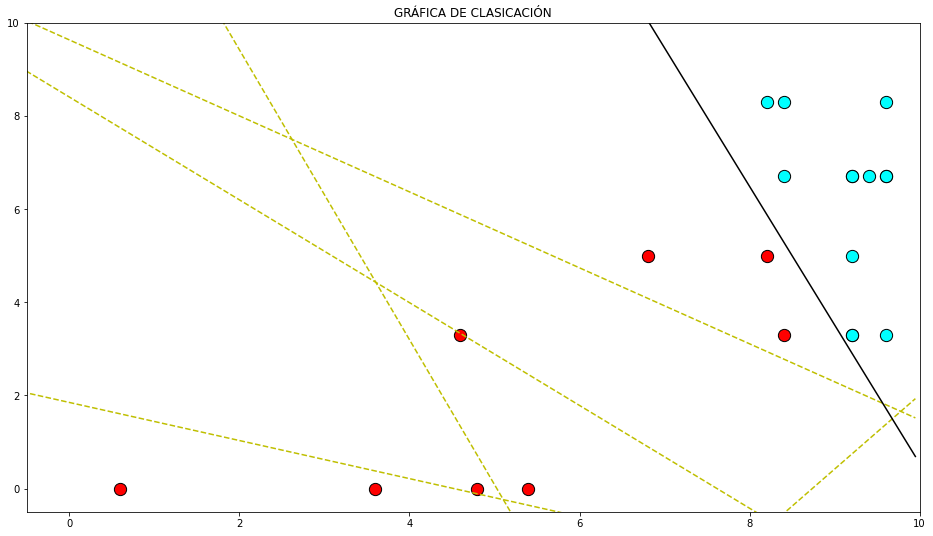

[(array([1.59087493]), array([-13.90115408])),
 (array([0.82828428]), array([-5.24948617])),
 (array([-0.03880249]), array([-3.16345478])),
 (array([0.016207]), array([-2.35148622])),
 (array([0.43507376]), array([-2.40118092])),
 (array([0.48556158]), array([-1.98560015])),
 (array([0.2707702]), array([-1.69877158])),
 (array([0.3265247]), array([-1.41073061])),
 (array([0.37371757]), array([-1.16692112])),
 (array([0.26781982]), array([-1.16612693])),
 (array([0.31952003]), array([-0.94109807])),
 (array([0.20911494]), array([-0.92152326])),
 (array([0.2653225]), array([-0.71527503])),
 (array([0.15041006]), array([-0.67691958])),
 (array([0.20674025]), array([-0.57824747])),
 (array([0.06305687]), array([-0.5185699])),
 (array([0.1427103]), array([-0.31145602])),
 (array([-0.00736059]), array([-0.22516385])),
 (array([0.00486053]), array([-0.11974717])),
 (array([0.06305687]), array([0.00956099])),
 (array([-0.14819549]), array([0.0682422])),
 (array([-0.15158064]), array([0.2061719

In [208]:
trainPerceptronAlgorithm(X,y)

In [209]:
#x = [np.arange(6).reshape(2,3)]
x = [[0,1],
    [2,3],
    [4,5]]
y = [1,1,1,0,0,0]
print (x)
print (y)

[[0, 1], [2, 3], [4, 5]]
[1, 1, 1, 0, 0, 0]


In [210]:
>>> np.argwhere(y==1)

array([], shape=(0, 0), dtype=int64)

In [10]:
print (x,[np.argwhere(y==1)])

[[0, 1], [2, 3], [4, 5]] [array([], shape=(0, 0), dtype=int64)]
